Here, we do some exploratory data analysis of data on weather in Austin, TX, USA.

'NOAA_QCLCD_2011_hourly_13904.csv' contains hourly weather data from 2011, including dry bulb temperature and whether it was overcast or clear or else ('sky_condition').  NOAA is the National Oceanic and Atmospheric Administration.  There are 10,337 observations, which is greater than 365 x 24, so some readings are more closely spaced than just hourly.  Note that this set has no column labels and several empty columns.

'weather_data_austin_2010.csv' is also hourly, has exactly 365 x 24 = 8760 rows, and has four columns including temperature and dew point.

Neither dataset is currently indexed by datetimes.

In [1]:
import pandas as pd

df_headers = pd.read_csv('NOAA_QCLCD_2011_hourly_13904.csv', header = None)

print(df_headers.head())

      0         1    2   3       4  5      6  7  8  9  ...   34 35     36 37  \
0  13904  20110101   53  12  OVC045     10.00          ...          29.95      
1  13904  20110101  153  12  OVC049     10.00          ...          30.01      
2  13904  20110101  253  12  OVC060     10.00          ...  030     30.01      
3  13904  20110101  353  12  OVC065     10.00          ...          30.03      
4  13904  20110101  453  12  BKN070     10.00          ...          30.04      

   38 39 40 41     42 43  
0  AA           29.95     
1  AA           30.02     
2  AA           30.02     
3  AA           30.04     
4  AA           30.04     

[5 rows x 44 columns]


In [4]:
column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'
list_to_drop = ['sky_conditionFlag',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_farenFlag',
 'dry_bulb_celFlag',
 'wet_bulb_farenFlag',
 'wet_bulb_celFlag',
 'dew_point_farenFlag',
 'dew_point_celFlag',
 'relative_humidityFlag',
 'wind_speedFlag',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressureFlag',
 'pressure_tendencyFlag',
 'pressure_tendency',
 'presschange',
 'presschangeFlag',
 'sea_level_pressureFlag',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'record_type',
 'altimeterFlag',
 'junk']

# 'column_labels' is a single string containing all column labels, separated by commas
column_labels_list = column_labels.split(',')
df_headers.columns = column_labels_list

# list_to_drop is a list of columns we wish to drop, namely the empty ones
df_dropped = df_headers.drop(list_to_drop, axis='columns')

print(df_dropped.shape)
print(df_dropped.head())
print(df_dropped.info())

(10337, 17)
    Wban      date  Time  StationType sky_condition visibility dry_bulb_faren  \
0  13904  20110101    53           12        OVC045      10.00             51   
1  13904  20110101   153           12        OVC049      10.00             51   
2  13904  20110101   253           12        OVC060      10.00             51   
3  13904  20110101   353           12        OVC065      10.00             50   
4  13904  20110101   453           12        BKN070      10.00             50   

  dry_bulb_cel wet_bulb_faren wet_bulb_cel dew_point_faren dew_point_cel  \
0         10.6             38          3.1              15          -9.4   
1         10.6             37          3.0              14         -10.0   
2         10.6             37          2.9              13         -10.6   
3         10.0             38          3.1              17          -8.3   
4         10.0             37          2.8              15          -9.4   

  relative_humidity wind_speed wind_directio

In [11]:
# Convert the date column from integer to string
df_dropped['date'] = df_dropped['date'].astype(str)

# Reformat the time column
# df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))
df_dropped['Time'] = df_dropped['Time'].astype(str)

# Concatenate the new date and time columns
date_string = df_dropped['date'] + df_dropped['Time']

# Convert the date_string pandas series to a datetime object
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

# Set the index to be the new date_times container (note we haven't dropped 'date' and 'Time')
df_clean = df_dropped.set_index(date_times)

print(df_clean.head())

                      Wban      date  Time  StationType sky_condition  \
2011-01-01 00:53:00  13904  20110101  0053           12        OVC045   
2011-01-01 01:53:00  13904  20110101  0153           12        OVC049   
2011-01-01 02:53:00  13904  20110101  0253           12        OVC060   
2011-01-01 03:53:00  13904  20110101  0353           12        OVC065   
2011-01-01 04:53:00  13904  20110101  0453           12        BKN070   

                    visibility dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 00:53:00      10.00             51         10.6             38   
2011-01-01 01:53:00      10.00             51         10.6             37   
2011-01-01 02:53:00      10.00             51         10.6             37   
2011-01-01 03:53:00      10.00             50         10.0             38   
2011-01-01 04:53:00      10.00             50         10.0             37   

                    wet_bulb_cel dew_point_faren dew_point_cel  \
2011-01-01 00:53:00          3.1

In [12]:
# Convert dry_bulb_faren column in opposite direction, from string to numeric
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')

# Notice the 'missing' entries now replaced by 'NaN' (= 'Not a Number')
print(df_clean.loc['2011-06-20 08:00:00':'2011-06-20 09:00:00', 'dry_bulb_faren'])

# Likewise, convert wind_speed and dew_point_faren columns to floats
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')

print(df_clean.info())

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10337 entries, 2011-01-01 00:53:00 to 2011-12-31 23:53:00
Data columns (total 17 columns):
Wban                  10337 non-null int64
date                  10337 non-null object
Time                  10337 non-null object
StationType           10337 non-null int64
sky_condition         10337 non-null object
visibility            10337 non-null object
dry_bulb_faren        10326 non-null float64
dry_bulb_cel          10337 non-null object
wet_bulb_faren        10337 non-null object
wet_bulb_cel          10337 non-null object
dew_point_faren       10323 non-null float64
dew_point_cel         10337 non-null object
relative_hu

Let's do a sanity check on the data.  Making sure that the median temperature in April - June was higher than the overall median temp, was in turn higher than the median in January:

In [14]:
# Overall median of the dry_bulb_faren column
print(df_clean['dry_bulb_faren'].median())

# Median of the dry_bulb_faren column for the range April - June (inclusive)
print(df_clean.loc['2011-04':'2011-06', 'dry_bulb_faren'].median())

# Median of the dry_bulb_faren column for the month of January
print(df_clean.loc['2011-Jan', 'dry_bulb_faren'].median())

72.0
78.0
48.0


How does average daily temperature in 2011 compare with that in 2010 (both measured in degrees Fahrenheit)?

In [18]:
df_climate = pd.read_csv('weather_data_austin_2010.csv', parse_dates = True, index_col = 'Date')

print(df_climate.head())
print(df_climate.info())

                     Temperature  DewPoint  Pressure
Date                                                
2010-01-01 00:00:00         46.2      37.5       1.0
2010-01-01 01:00:00         44.6      37.1       1.0
2010-01-01 02:00:00         44.1      36.9       1.0
2010-01-01 03:00:00         43.8      36.9       1.0
2010-01-01 04:00:00         43.5      36.8       1.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 3 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
dtypes: float64(3)
memory usage: 273.7 KB
None


In [25]:
# Downsample df_clean by day and aggregate by mean
daily_mean_2011 = df_clean.resample('D').mean()

# Extract dry_bulb_faren column from daily_mean_2011 as a numpy array
daily_temp_2011 = daily_mean_2011['dry_bulb_faren'].values

# Downsample df_climate by day and aggregate by mean
daily_climate = df_climate.resample('D').mean()

# Extract temperature column from daily_climate as a numpy array
# daily_temp_climate = daily_climate.reset_index()['Temperature']
daily_temp_climate = daily_climate['Temperature'].values

# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())

1.33018318701


So the mean difference between mean daily temperatures was about 1.3 degrees, warmer in 2011 than 2010.

Now let's study sunny temperatures (and other attributes) versus cloudy temperatures (and other attributes) in 2011.

In [26]:
# Select days that are sunny
sunny = df_clean.loc[df_clean['sky_condition'].str.contains('CLR')]

# Select days that are overcast
overcast = df_clean.loc[df_clean['sky_condition'].str.contains('OVC')]

# Resample sunny and overcast, aggregating by daily maximum
sunny_daily_max = sunny.resample('D').max()
overcast_daily_max = overcast.resample('D').max()

# Find difference between mean of sunny_daily_max and mean of overcast_daily_max
print(sunny_daily_max.mean() - overcast_daily_max.mean())

Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


Unsurprisingly, sunny days tended to be warmer (and less windy).

                visibility  dry_bulb_faren
visibility        1.000000        0.490328
dry_bulb_faren    0.490328        1.000000


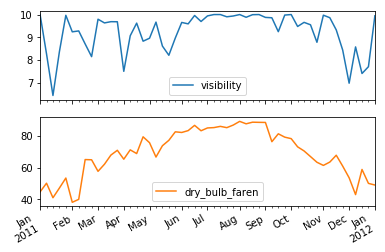

In [30]:
import matplotlib.pyplot as plt

df_clean['visibility'] = pd.to_numeric(df_clean['visibility'], errors='coerce')

# Select visibility and dry_bulb_faren columns and resample them weekly, aggregating by mean
weekly_mean = df_clean[['visibility','dry_bulb_faren']].resample('W').mean()

# Find the Pearson correlation coefficient between the above weekly statistics
print(weekly_mean.corr())

# subplots=True due to different units on vertical axis
weekly_mean.plot(subplots=True)
plt.show()

So there's a positive correlation between visibility and temperature.

Analysis of number of sunny hours in a day:

10.0
4.0
1.0
24.0
0.0


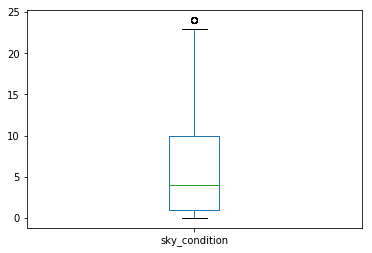

In [33]:
# Create a Boolean series for sunny days
sunny = df_clean['sky_condition'] == 'CLR'

# Resample the Boolean series by day and compute the sum
sunny_hours = sunny.resample('D').sum()

print(sunny_hours.quantile(0.75))
print(sunny_hours.quantile())
print(sunny_hours.quantile(0.25))
print(sunny_hours.max())
print(sunny_hours.min())

# Resample the Boolean series by day and compute the count
# total_hours = sunny.resample('D').count()

# Divide sunny_hours by total_hours
# sunny_fraction = sunny_hours / total_hours

# Make box plot of sunny_hours
sunny_hours.plot(kind='box')
plt.show()

So the median number of sunny hours was 4, and the inter-quartile range was 1 sunny hour (25th percentile) through 10 sunny hours (75th percentile).

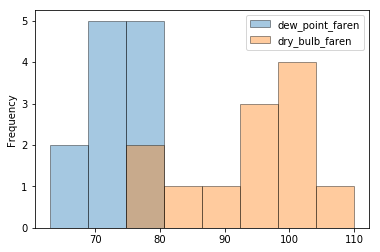

In [35]:
# Resample dew_point_faren and dry_bulb_faren by month, aggregating the maximum values
monthly_max = df_clean[['dew_point_faren','dry_bulb_faren']].resample('M').max()

# Generate a histogram
monthly_max.plot(kind = 'hist', bins = 8, alpha = 0.4, ec = 'black')

plt.show()

So in 2011, the maximum monthly dew point was above 60 degrees in every month, and the max monthly temp was above 70 in every month.

What is the probability that a max daily temp (local max) in August 2011 exceeded the max monthly temp (global max) for August 2010?

95.3
30


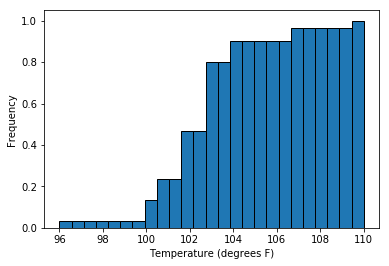

In [40]:
# Extract the maximum temperature in August 2010 from df_climate
august_max = df_climate.loc['2010-08','Temperature'].max()
print(august_max)

# Resample the August 2011 temperatures in df_clean by day and aggregate the maximum value
august_2011 = df_clean.loc['2011-08','dry_bulb_faren'].resample('D').max()

# Filter out days in August 2011 where max temp exceeded august_max
august_2011_high = august_2011[august_2011 > august_max]
print(len(august_2011_high))

# Construct a cumulative distribution function of august_2011_high
august_2011_high.plot(kind='hist',normed=True,cumulative=True,bins=25,ec='black')
plt.xlabel('Temperature (degrees F)')
plt.show()

For all days but one in August 2011, the high temperature exceeded the monthly high from August 2010.

Interpretation of CDF: assuming it's one of these 30 days, the CDF at temperature X gives the probability that the daily high was less than or equal to X.